In [210]:
import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import cv2
from src.data_cleaning import clean_df, normalize_sequence_count

In [8]:
full_df = pd.read_csv("../data/raw/train.csv")
full_df = full_df[full_df.columns.drop([col for col in full_df.columns if col.startswith("tof_")])]

full_df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,thm_3,thm_4,thm_5
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,3.355469,0.134399,-0.355164,-0.447327,-0.809753,28.943842,31.822186,29.553024,28.592863,28.310535
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,3.125000,0.143494,-0.340271,-0.428650,-0.824524,29.340816,31.874645,29.791740,28.663383,28.406172
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,5.421875,0.219055,-0.274231,-0.356934,-0.865662,30.339359,30.935045,30.090014,28.796087,28.529778
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,6.457031,0.297546,-0.264160,-0.238159,-0.885986,30.543730,27.044001,29.310717,29.018711,27.402010
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,9.632812,0.333557,-0.218628,-0.063538,-0.914856,29.317265,25.270855,26.808746,29.408604,27.357603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,-8.441406,0.106628,-0.862488,-0.470825,-0.151733,29.329695,27.966221,27.857061,30.359417,29.501087
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,-9.207031,0.110596,-0.865417,-0.460327,-0.164185,29.370110,28.101042,27.965866,30.417227,29.244358
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,-7.402344,0.113159,-0.864258,-0.461182,-0.166138,29.458855,28.060148,27.893045,30.340141,29.244358
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,-9.085938,0.117493,-0.866760,-0.450623,-0.178467,29.789215,28.434057,28.046608,30.397961,28.868093


In [195]:
cleaned_df, target_gestures = clean_df(full_df, drop_rot_na=True, drop_thm_na=True, max_gesture_count=35)
cleaned_df = normalize_sequence_count(cleaned_df)

[rot_na] Remaining: 254179/574945 (-320766, 55.8% dropped)
[thm_na] Remaining: 238263/254179 (-15916, 6.3% dropped)
[gesture_len outliers] Remaining: 209127/238263 (-29136, 12.2% dropped)


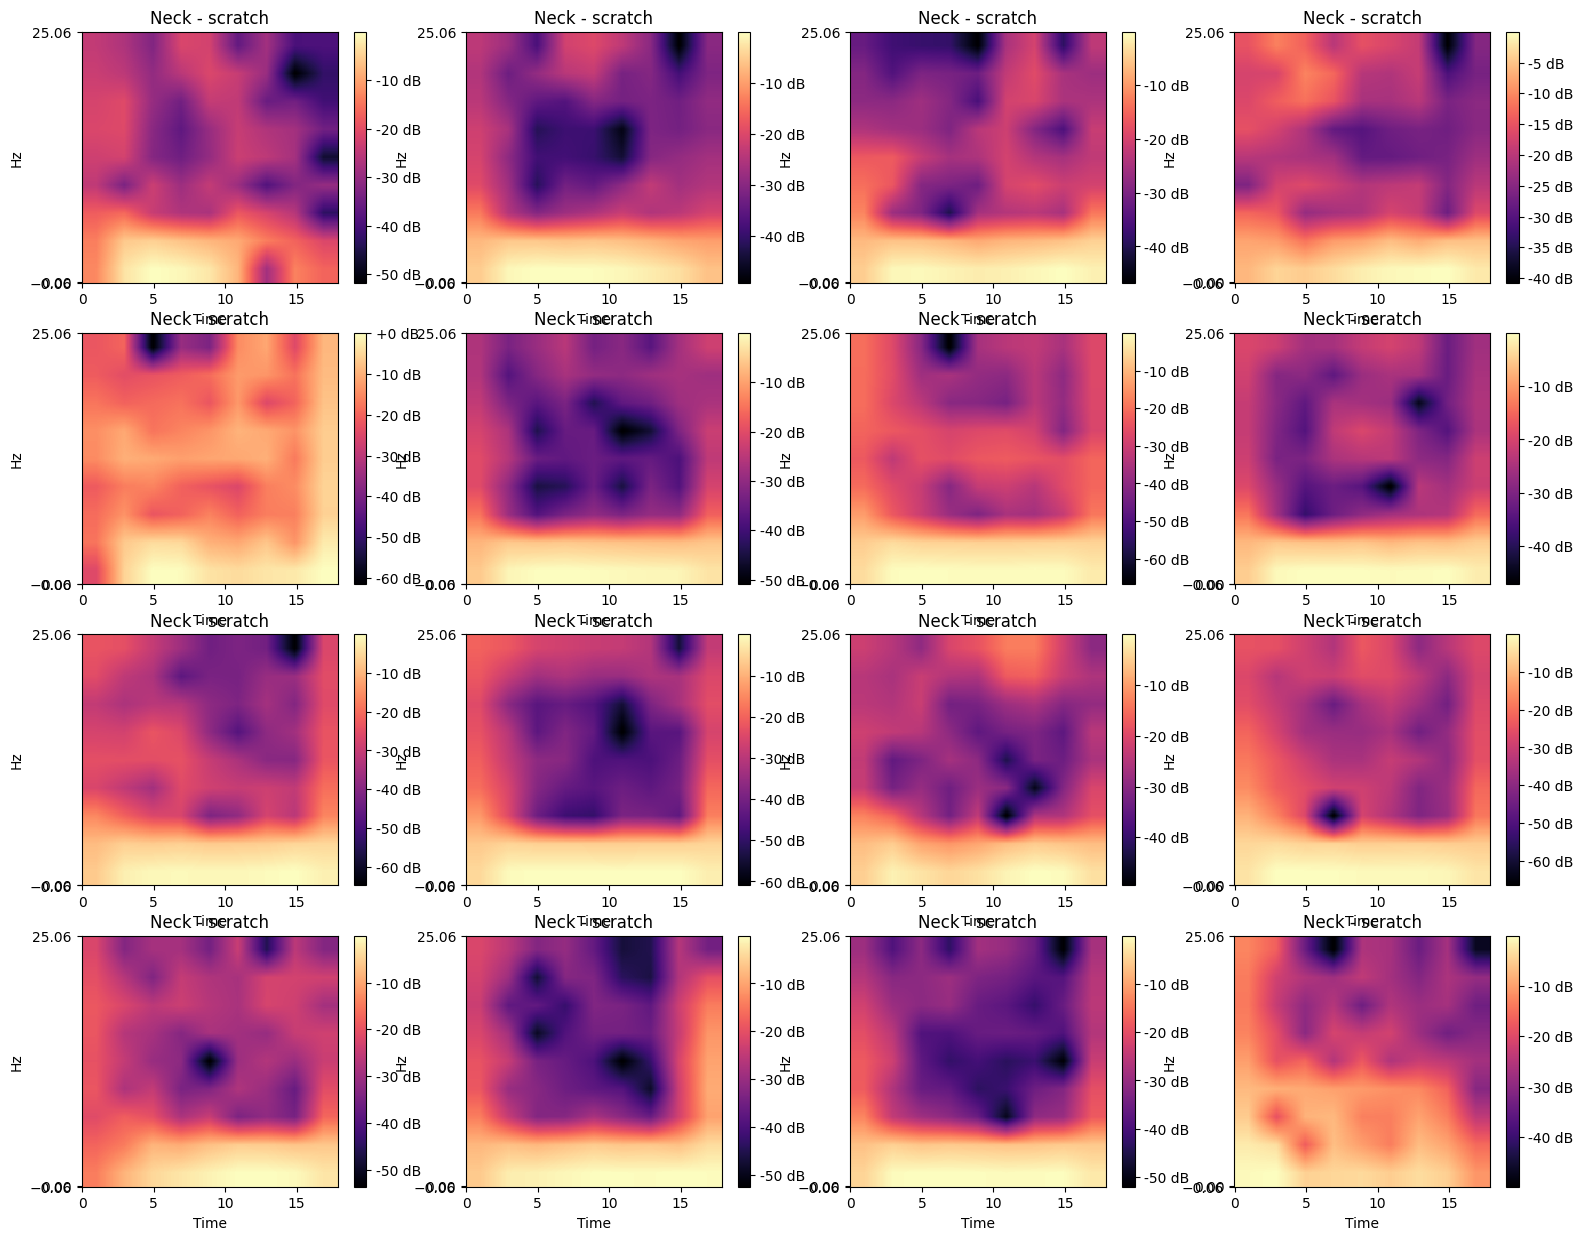

In [213]:
gesture = cleaned_df[cleaned_df["gesture"] == target_gestures[2]]
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(19, 15))

ax = ax.flatten()

for i in range(0,  4*4):
    seq = gesture['sequence_id'].unique()[i - 1]
    waveform = np.array(gesture[gesture['sequence_id'] == seq]['acc_x'])
    S_wave = librosa.stft(waveform, n_fft=16, hop_length=4)

    D_wave = librosa.amplitude_to_db(np.abs(S_wave), ref=np.max)
    D_wave = cv2.resize(D_wave, (224, 224))
    
    img = librosa.display.specshow(D_wave, sr=50, hop_length=4, x_axis="time", y_axis="log", ax=ax[i])
    ax[i].set_title(gesture['gesture'].unique()[0])
    fig.colorbar(img, ax=ax[i], format='%+2.0f dB') # Add a colorbar